🟦 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/engineered_dataset.csv")


🟩 2. Sales Overview

In [2]:
df["revenue"] = df["price"] + df["freight_value"]
df["revenue"].sum()


16625109.600000001

2.2 Monthly Sales Trend

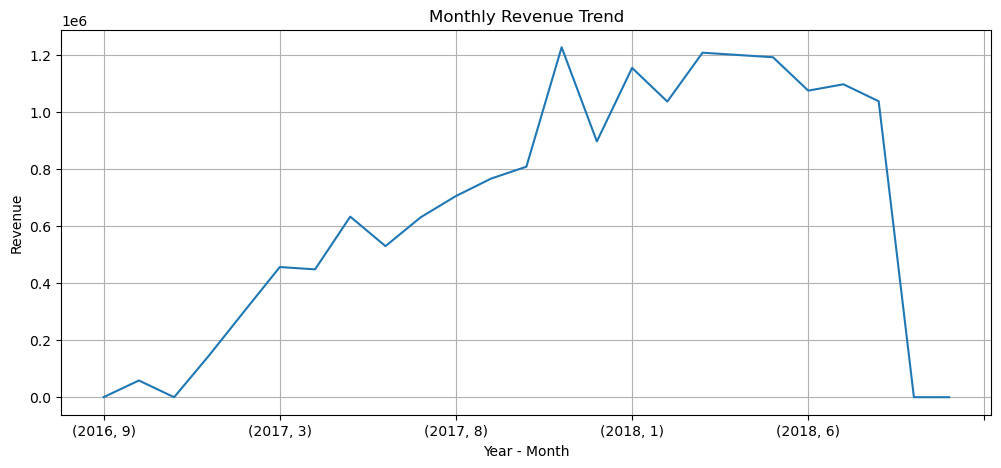

In [3]:
monthly_sales = df.groupby(["order_year", "order_month"])["revenue"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Year - Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


🟩 3. Best-selling Product Categories

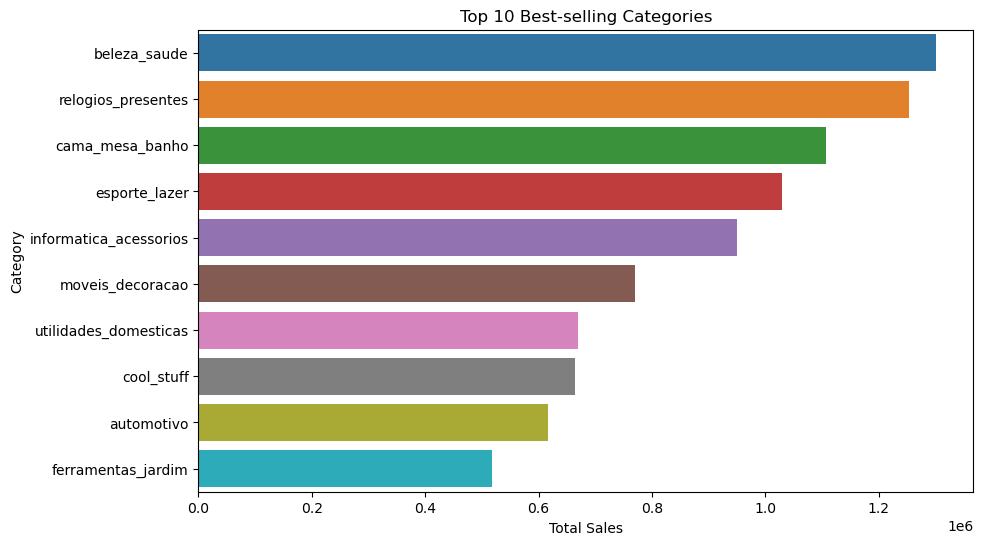

In [7]:
category_sales = df.groupby("product_category_name")["price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Top 10 Best-selling Categories")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


🟩 4. Most Expensive Categories

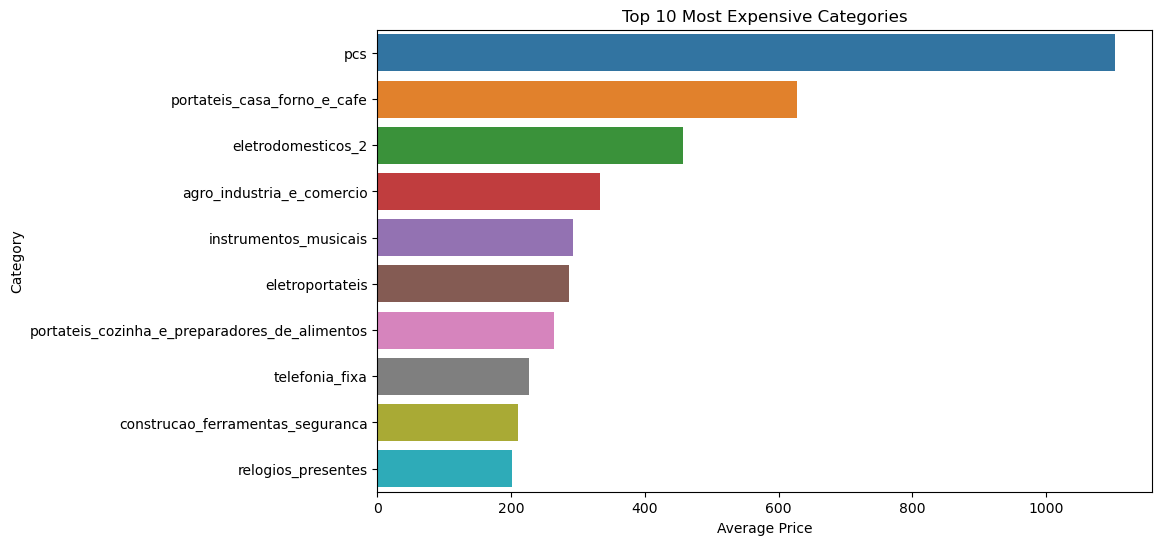

In [5]:
expensive_categories = df.groupby("product_category_name")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=expensive_categories.values, y=expensive_categories.index)
plt.title("Top 10 Most Expensive Categories")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()


🟩 5. Customer Insights

5.1 Total Spent Distribution

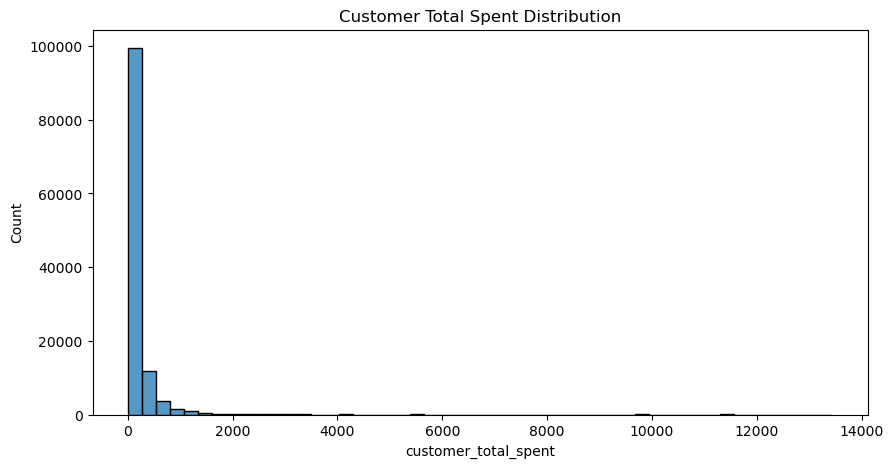

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["customer_total_spent"], bins=50)
plt.title("Customer Total Spent Distribution")
plt.show()


5.2 Customer Order Count

In [9]:
df["customer_order_count"].value_counts().head()


1    81529
2    21095
3     6153
4     3904
6     1842
Name: customer_order_count, dtype: int64

🟩 6. Revenue by Weekday

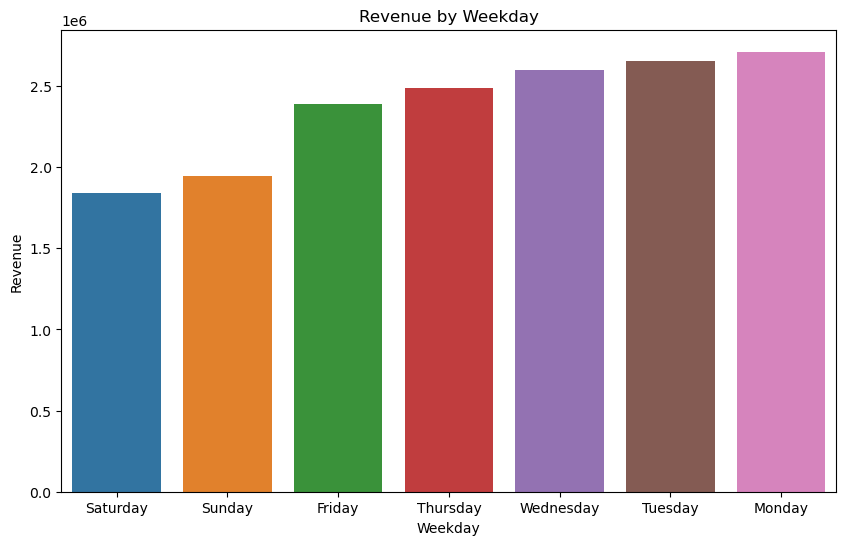

In [11]:
weekday_rev = df.groupby("order_weekday")["revenue"].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(y=weekday_rev.values, x=weekday_rev.index)
plt.title("Revenue by Weekday")
plt.ylabel("Revenue")
plt.xlabel("Weekday")
plt.show()


🟩 7. Shipping Cost vs Product Price

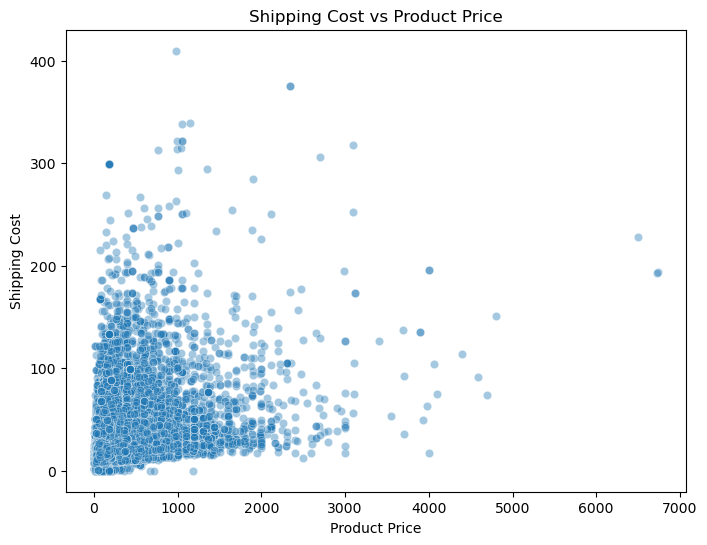

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["price"], y=df["freight_value"], alpha=0.4)
plt.title("Shipping Cost vs Product Price")
plt.xlabel("Product Price")
plt.ylabel("Shipping Cost")
plt.show()


🟦 Save EDA Insights (Optional)

In [13]:
df.to_csv("../Data/eda_ready.csv", index=False)
